### 1. Introduction

The objectives of this project are as follows:

1. Analyze different marketing campaigns to identify the most effective strategies in terms of ROI and lead generation.
2. Determine the optimal allocation of the marketing budget to maximize the impact of campaigns.
3. Provide recommendations for an optimized marketing campaign approach based on the available budget.

The rest of the project will consider the following main topics:

- Background
- Data preprocessing
- Data analysis

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

### 2. Preprocessing
`
The dataset is retrieved from: https://www.kaggle.com/madislemsalu/facebook-ad-campaign, describing the marketing and conversion information FaceBooks’s social media ad campaign.

Overall, the data has 1143 entries and 11 columns. A brief description for each column can be given as follows:

- ad_id: an unique ID for each ad.
- campaign_id: is the ID assigned by the ad running company.
- fb_campaign_id: is the ID assigned by facebook for every ad set.
- age: age of the person to whom the ad is shown.
- gender: gender of the person to whim the add is shown
- Interest1, Interest2, Interest3 are the user interests and likes of facebook users who were taregted for the ad
- impressions: the number of times the ad was shown.
- clicks: number of clicks on for that ad.
- spent: Amount paid by company xyz to Facebook, to show that ad.
- total_conversion: is the total number of users who have clicked the ad and have made a purchase or installed an app.
- approved_conversion: tells the total number of people who became actual active users.

In [2]:
df = pd.read_csv('data.csv')
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

In [4]:
df.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1143.000000,761.000000,761.000000
mean,9.872611e+05,33.884514,1.180606e+05,42.474191,6.872500e+04,11.629921,17.597760,2.161629,0.768725
std,1.939928e+05,27.560263,2.670506e+05,48.987248,2.067023e+05,27.347899,48.418711,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,16.000000,2.200000e+01,19.000000,1.442650e+02,1.000000,0.000000,1.000000,0.000000
50%,1.121185e+06,26.000000,3.300000e+01,27.000000,3.142000e+03,2.000000,1.530000,1.000000,0.000000
75%,1.121804e+06,32.000000,9.889400e+04,38.000000,2.786400e+04,8.000000,8.540000,2.000000,1.000000
max,1.314415e+06,120.000000,2.286228e+06,421.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


In [5]:
df.isnull().sum()

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
dtype: int64

- There are 382 null values in total conversion and approved conversion
- since total_conversion and approved_conversion are the key features for this data and predictive analysis, remove the rows with null values in these two features.

In [6]:
df= df.dropna()
df.shape

(761, 15)

In [7]:
same_dates = (df['reporting_start'] == df['reporting_end']).all()

unique_start_dates = df['reporting_start'].nunique()
unique_end_dates = df['reporting_end'].nunique()

print(f"Are 'reporting_start' and 'reporting_end' always identical? {same_dates}")
print(f"Unique 'reporting_start' values: {unique_start_dates}")
print(f"Unique 'reporting_end' values: {unique_end_dates}")

Are 'reporting_start' and 'reporting_end' always identical? True
Unique 'reporting_start' values: 14
Unique 'reporting_end' values: 14


Observations made from current cleaning:

1. Redundant Information (reporting_start and reporting_end)
	- Both reporting_start and reporting_end have the same values for each row, meaning the dataset captures daily snapshots of the campaign performance.
	- If the data is already structured in a way where each row represents a single day’s performance, keeping these columns may not add value.

2. Unnecessary Identifier (fb_campaign_id)
	- fb_campaign_id is an identifier but does not provide useful information for analysis.
	- If campaign_id already uniquely identifies campaigns, then fb_campaign_id may be redundant.

In [8]:
df = df.drop(['reporting_start','reporting_end','fb_campaign_id'], axis=1)

In [9]:
df.head()

,ad_id,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,916,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,916,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,916,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,916,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [10]:
df.to_csv('cleaned_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_data.csv'.")

Cleaned dataset saved as 'cleaned_data.csv'.


### 3. Exploratory Data Analysis

In [11]:
sns.set_style("darkgrid")

In [12]:
df.age.value_counts()

age
30-34    327
35-39    180
40-44    139
45-49    115
Name: count, dtype: int64

1. **Count Plot** - Count By Age Groups

<Axes: xlabel='count', ylabel='age'>

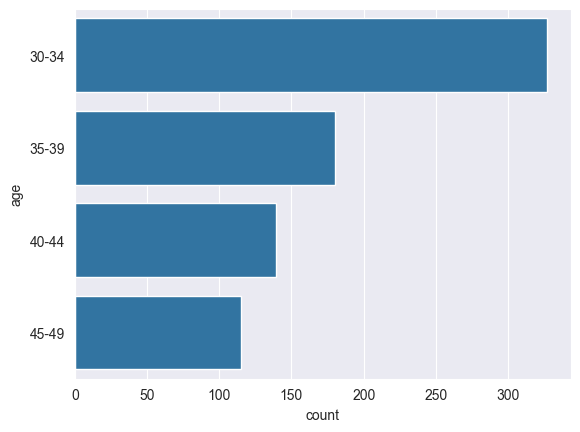

In [13]:
sns.countplot(df.age)

2. **Bar Plot** - Average Clicks per Age Group

C:\Users\lemon\AppData\Local\Temp\ipykernel_25392\2834877302.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['age'], y=df['clicks'], estimator=sum, ci=None, palette='Blues')
C:\Users\lemon\AppData\Local\Temp\ipykernel_25392\2834877302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['age'], y=df['clicks'], estimator=sum, ci=None, palette='Blues')


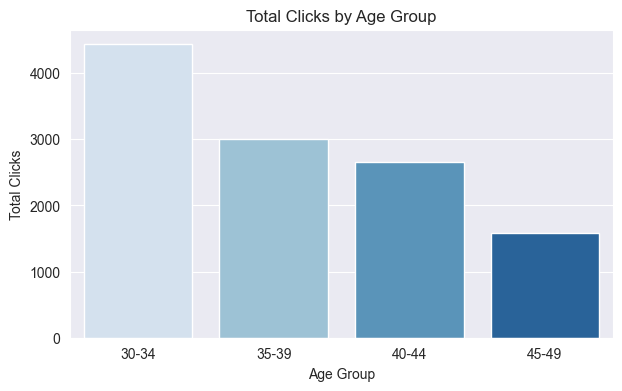

In [14]:
plt.figure(figsize=(7, 4))
sns.barplot(x=df['age'], y=df['clicks'], estimator=sum, ci=None, palette='Blues')
plt.title("Total Clicks by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Clicks")
plt.show()

3. **Histogram** - Distribution of Impressions


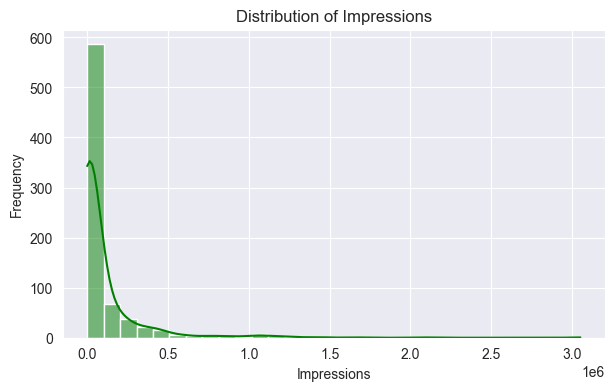

In [15]:
plt.figure(figsize=(7, 4))
sns.histplot(df['impressions'], bins=30, kde=True, color='green')
plt.title("Distribution of Impressions")
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.show()

1. Highly Right-Skewed Distribution
	- Most ads receive very low impressions, clustered on the left side.
	- A few ads have very high impressions, forming a long tail extending to the right.
2. Outliers Present
	- Some ads might be getting millions of impressions, but they are rare.
	- The majority of ads seem to get impressions in a much lower range.
3. Potential Power Law Distribution
	- This pattern suggests a small number of high-performing ads dominate impressions, while most ads get minimal visibility.
	- A common trend in digital advertising, where a few campaigns outperform the rest.

3.1. **Box Plot** - Distribution of Impressions

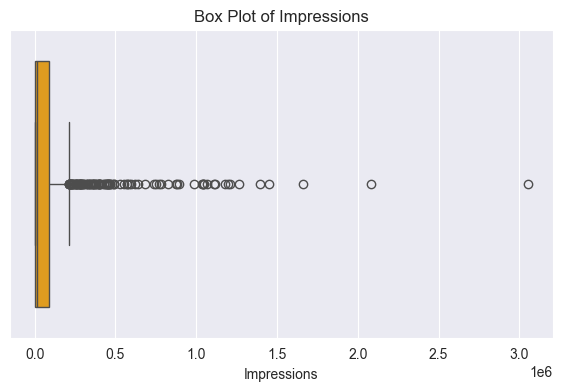

In [16]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['impressions'], color="orange")
plt.title("Box Plot of Impressions")
plt.xlabel("Impressions")
plt.show()

- The box is very small and squeezed to the left, meaning most ads get very low impressions.
- The long right whisker and many outliers confirm that a few ads receive extremely high impressions.

4. **KDE Plot** - Spent Amount Distribution

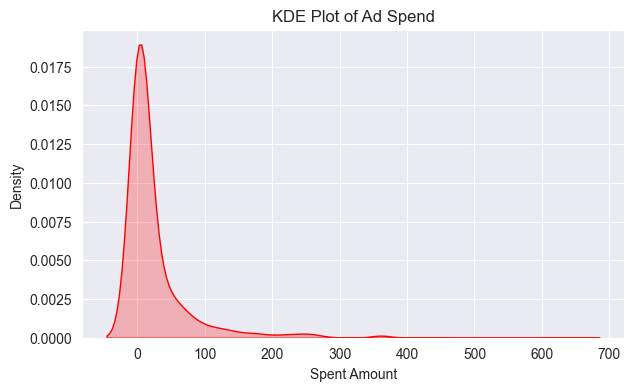

In [17]:
plt.figure(figsize=(7, 4))
sns.kdeplot(df['spent'], fill=True, color='red')
plt.title("KDE Plot of Ad Spend")
plt.xlabel("Spent Amount")
plt.show()

5. **Pie Chart** - Gender Distribution

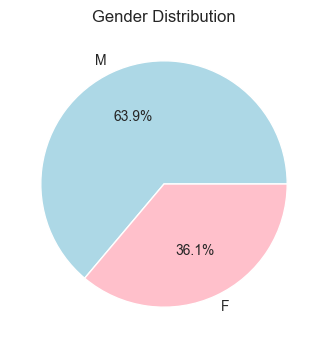

In [18]:
plt.figure(figsize=(4, 4))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

6. **Stacked Bar Chart** - Occurrences of gender within each age group

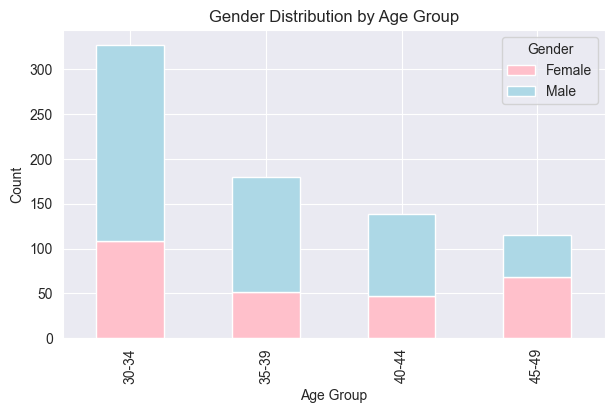

In [19]:
gender_age_counts = df.groupby(['age', 'gender']).size().unstack()

gender_age_counts.plot(kind='bar', stacked=True, figsize=(7, 4), color=['pink', 'lightblue'])

plt.title("Gender Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Gender", labels=["Female", "Male"])
plt.show()

7. **Scatter Plot** - Impressions vs. Clicks

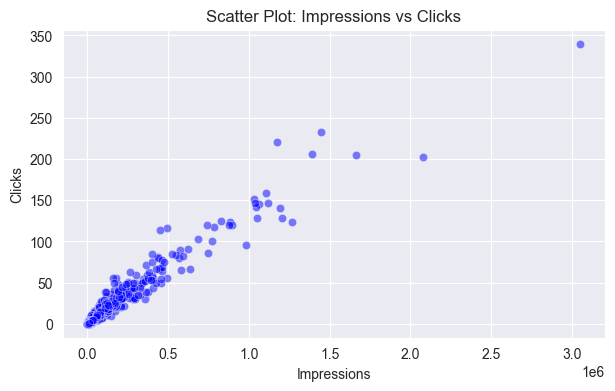

In [20]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x=df['impressions'], y=df['clicks'], alpha=0.5, color="blue")
plt.title("Scatter Plot: Impressions vs Clicks")
plt.xlabel("Impressions")
plt.ylabel("Clicks")
plt.show()

Positive Correlation:
 - As impressions increase, clicks also increase.
 - This suggests that ads shown more frequently tend to receive more clicks, which is expected in digital advertising.

8. **Correlation Heatmap** - Correlation Among Attributes

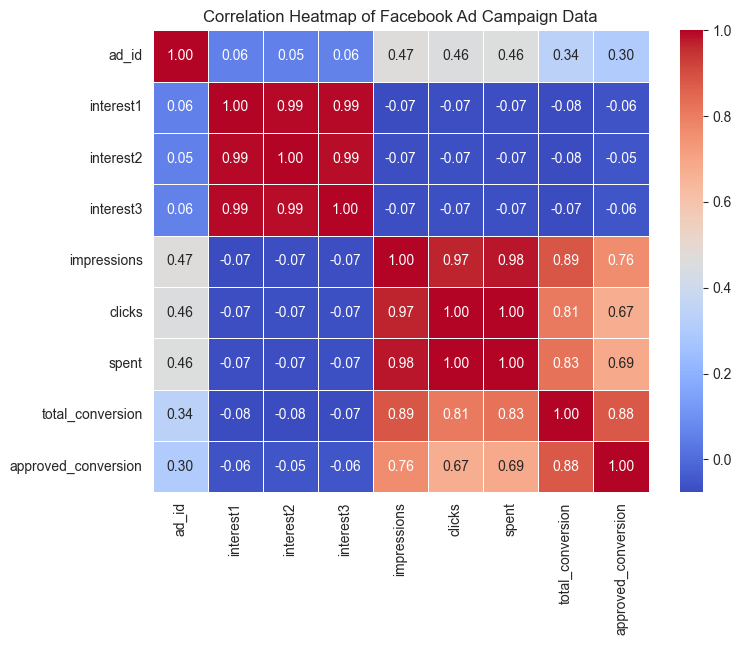

In [21]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Facebook Ad Campaign Data")
plt.show()

1. Strong Positive Correlations (Close to +1)
    - impressions ↔ clicks (0.97):
        - More impressions almost always lead to more clicks.
	    - Indicates that visibility is a key driver for engagement.
	- impressions ↔ spent (0.98)
	    - More spending directly increases impressions, suggesting a pay-to-reach model.
	- clicks ↔ total_conversion (0.81)
	    - More clicks tend to result in more conversions, meaning ads that get more engagement are more likely to convert.
	- total_conversion ↔ approved_conversion (0.88)
	    - Most conversions are approved

### 4. Statistical Data Analysis

**CTR (Click-Through Rate)**:

CTR measures the percentage of users who clicked on an ad after seeing it.

$$
CTR (\%) = \left(\frac{\text{Clicks}}{\text{Impressions}}\right) \times 100
$$

- **Clicks** = Number of times the ad was clicked  
- **Impressions** = Number of times the ad was shown  


**CPC (Cost Per Click)**:

The CPC formula calculates the cost of each click:

$$
CPC = \frac{\text{Spent}}{\text{Clicks}}
$$

In [22]:
df['CTR (%)'] = (df['clicks'] / df['impressions']) * 100
df['CPC ($)'] = df['spent'] / df['clicks']

print(df[['CTR (%)', 'CPC ($)']].describe())

          CTR (%)     CPC ($)
count  761.000000  558.000000
mean     0.015444    1.503770
std      0.013318    0.284427
min      0.000000    0.180000
25%      0.000000    1.362976
50%      0.014513    1.540000
75%      0.023480    1.702216
max      0.105932    2.212000


### **CTR & CPC Analysis: Actionable Insights**

**1. Low Mean CTR (1.54%) Indicates Engagement Challenges**
- The average Click-Through Rate (CTR) is **1.54%**, which is relatively low.
- **50% of ads** have a CTR **below 1.45%**, indicating that engagement levels are suboptimal.
- **25% of ads have a CTR of 0%**, meaning they failed to generate any interaction.

**Strategic Recommendations:**
- **Refine audience segmentation**: Utilize granular targeting (age, gender, behavioral data) to improve ad relevance.
- **A/B Test ad creatives**: Experiment with different ad formats, copy variations, and visual elements.
- **Enhance Call-To-Action (CTA) strategies**: Use compelling 'Call To Actions' such as *“Claim Offer”* or *“Learn More”* to drive interaction.
- **Optimize ad placement strategies**: Test Facebook feed vs. Instagram Stories to identify high-engagement channels.



**2. CPC Variability Suggests Optimization Opportunities**
- Mean **Cost Per Click (CPC)** is **$1.50**, which is within an acceptable range.
- CPC varies significantly:
  - **Minimum CPC: $0.18 → Some campaigns achieve highly cost-effective clicks.**
  - **Maximum CPC: $2.21 → Certain ads have inefficient cost structures.**
  - **Standard Deviation: $0.28 → Moderate dispersion in CPC values.**

**Strategic Recommendations:**
- **Budget reallocation**: Shift ad spend from high-CPC campaigns to more cost-efficient ones.
- **Leverage cost-effective targeting**: Analyze and scale low-CPC campaigns for optimal performance.
- **Adjust bidding strategies**: Reduce bid amounts for high-CPC campaigns to maximize Return on Ad Spend (ROAS).



**3. Zero-CTR Ads Are Wasting Ad Spend**
- **25% of ads have a CTR of 0%**, indicating **poor engagement and wasted impressions.**
- These ads may suffer from **irrelevant targeting, weak creative appeal, or poor positioning**.

**Strategic Recommendations:**
- **Pause underperforming campaigns**: Remove ads with no engagement to optimize budget efficiency.
- **Perform diagnostic analysis**: Identify common characteristics in low-CTR ads (demographics, interests, ad format).
- **Conduct audience intent testing**: Use A/B testing to validate targeting hypotheses.



**4. High CTR Variability Highlights Top-Performing Ads**
- **Max CTR = 10.59%**, which is **7× higher than the mean**, indicating some ads are highly effective.
- A **significant performance gap** exists between top and bottom-performing ads.

**Strategic Recommendations:**
- **Expand top-performing campaigns**: Increase ad spend on ads with high CTR and low CPC.
- **Develop predictive modeling**: Use Machine Learning (ML) or regression analysis to predict CTR performance based on ad characteristics.


In [23]:
df.head()

,ad_id,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR (%),CPC ($)
0,708746,916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0.013605,1.43
1,708749,916,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.011198,0.91
2,708771,916,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0.000000,NaN
3,708815,916,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0.023480,1.25
4,708818,916,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0.024195,1.29


CPC has NaN values as a result of dividing by zero

In [24]:
df['CPC ($)'] = df['CPC ($)'].fillna(0)

In [25]:
df.head()

,ad_id,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR (%),CPC ($)
0,708746,916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0.013605,1.43
1,708749,916,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.011198,0.91
2,708771,916,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0.000000,0.00
3,708815,916,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0.023480,1.25
4,708818,916,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0.024195,1.29


**Cost Analysis**:

In [26]:
print('Campaign wise clicks')
print((df.groupby(['campaign_id'])).clicks.sum())
print('-------------------------')

print('Campaign wise amount spent')
print((df.groupby(['campaign_id'])).spent.sum())
print('--------------------------')


print('Campaign wise total conversions')
print((df.groupby(['campaign_id'])).total_conversion.sum())
print('---------------------------')

print('Campaign wise ad count')
print((df.groupby(['campaign_id'])).ad_id.count())
print('===========================')

Campaign wise clicks
campaign_id
1178    9577
916      113
936     1984
Name: clicks, dtype: int64
-------------------------
Campaign wise amount spent
campaign_id
1178    16577.159998
916       149.710001
936      2893.369999
Name: spent, dtype: float64
--------------------------
Campaign wise total conversions
campaign_id
1178    1050.0
916       58.0
936      537.0
Name: total_conversion, dtype: float64
---------------------------
Campaign wise ad count
campaign_id
1178    243
916      54
936     464
Name: ad_id, dtype: int64


In [27]:
campaign_1178_clicks = 9577
campaign_1178_cost = 16577.159998
campaign_1178_conv = 1050
campaign_1178_adcount = 243
campaign_1178_cpc = (campaign_1178_cost/campaign_1178_clicks)
campaign_1178_cpco = (campaign_1178_cost/campaign_1178_conv)
campaign_1178_cpad = (campaign_1178_cost/campaign_1178_adcount)

print('Cost Per Click of campaign_1178 is '+ str(campaign_1178_cpc))
print('Cost Per Conversion of campaign_1178 is '+ str(campaign_1178_cpco))
print('Cost Per Ad in campaign_1178 is '+ str(campaign_1178_cpad))
print('---------------------------------------------------------------')


campaign_936_clicks = 1984
campaign_936_cost = 2893.369999
campaign_936_conv = 537
campaign_936_adcount = 464
campaign_936_cpc = (campaign_936_cost/campaign_936_clicks)
campaign_936_cpco = (campaign_936_cost/campaign_936_conv)
campaign_936_cpad = (campaign_936_cost/campaign_936_adcount)

print('Cost Per Click of campaign_936 is '+ str(campaign_936_cpc))
print('Cost Per Conversion of campaign_936 is '+ str(campaign_936_cpco))
print('Cost Per Ad in campaign_936 is '+ str(campaign_936_cpad))
print('---------------------------------------------------------------')

campaign_916_clicks = 113
campaign_916_cost = 149.710001
campaign_916_conv = 58
campaign_916_adcount = 54
campaign_916_cpc = (campaign_916_cost/campaign_916_clicks)
campaign_916_cpco = (campaign_916_cost/campaign_916_conv)
campaign_916_cpad = (campaign_916_cost/campaign_916_adcount)

print('Cost Per Click of campaign_916 is '+ str(campaign_916_cpc))
print('Cost Per Conversion of campaign_916 is '+ str(campaign_916_cpco))
print('Cost Per Ad in campaign_916 is '+ str(campaign_916_cpad))
print('---------------------------------------------------------------')

Cost Per Click of campaign_1178 is 1.7309345304375063
Cost Per Conversion of campaign_1178 is 15.787771426666666
Cost Per Ad in campaign_1178 is 68.2187654238683
---------------------------------------------------------------
Cost Per Click of campaign_936 is 1.4583518140120968
Cost Per Conversion of campaign_936 is 5.388026068901303
Cost Per Ad in campaign_936 is 6.23571120474138
---------------------------------------------------------------
Cost Per Click of campaign_916 is 1.3248672654867257
Cost Per Conversion of campaign_916 is 2.5812069137931037
Cost Per Ad in campaign_916 is 2.772407425925926
---------------------------------------------------------------


- From the above analysis it is very clear that campaign 916 is the most efficient and profitable campaign.
- The cpc and cost per conversion is very low compared other campaigns.
- If FaceBook scales up the campaign 916 to the budget of campaign 1178, they might drive 5 times more results of campaign 1178

### 5. Modeling & Evaluation



In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [29]:
df.dtypes

ad_id                    int64
campaign_id             object
age                     object
gender                  object
interest1                int64
interest2                int64
interest3                int64
impressions            float64
clicks                   int64
spent                  float64
total_conversion       float64
approved_conversion    float64
CTR (%)                float64
CPC ($)                float64
dtype: object

Encoding Object data types: 
- Age(0: 30-34, 1: 35-39, 2: 40-44, 3: 45-49)
- Gender (1: M, 0: F)

In [30]:
encoder=LabelEncoder()

encoder.fit(df["gender"])
df["gender"]=encoder.transform(df["gender"])

encoder.fit(df["age"])
df["age"]=encoder.transform(df["age"])

df['campaign_id'] = df['campaign_id'].astype(int)

In [31]:
df.head()

,ad_id,campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR (%),CPC ($)
0,708746,916,0,1,15,17,17,7350.0,1,1.43,2.0,1.0,0.013605,1.43
1,708749,916,0,1,16,19,21,17861.0,2,1.82,2.0,0.0,0.011198,0.91
2,708771,916,0,1,20,25,22,693.0,0,0.00,1.0,0.0,0.000000,0.00
3,708815,916,0,1,28,32,32,4259.0,1,1.25,1.0,0.0,0.023480,1.25
4,708818,916,0,1,28,33,32,4133.0,1,1.29,1.0,1.0,0.024195,1.29


In [32]:
X = df.drop(['ad_id', 'CTR (%)', 'CPC ($)'], axis=1)
y = df['CTR (%)']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1)
}

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
results = []

for name, model in models.items():

    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

In [37]:
results_df = pd.DataFrame(results).sort_values('RMSE')
print("\nModel Evaluation Results:")
print(results_df)


Model Evaluation Results:
               Model      RMSE       MAE         R²
3      Random Forest  0.002731  0.001641   0.946596
0  Linear Regression  0.010826  0.007993   0.160731
1   Ridge Regression  0.010868  0.008005   0.154265
2   Lasso Regression  0.011890  0.009565  -0.012230
4                SVR  0.040336  0.038568 -10.649717


In [38]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

In [39]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(best_model)

RandomForestRegressor(random_state=42)


In [40]:
# Train the best model on the full dataset
X_scaled = scaler.fit_transform(X)
best_model.fit(X_scaled, y)

RandomForestRegressor(random_state=42)

In [41]:
import joblib

# Export the best model to a file
joblib.dump(best_model, 'ad_conversion_best_model2.joblib')
print("Model successfully exported to ad_conversion_best_model.joblib")

Model successfully exported to ad_conversion_best_model.joblib


In [42]:
loaded_model = joblib.load('ad_conversion_best_model2.joblib')

In [43]:
feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                Feature  Importance
7                clicks    0.312116
8                 spent    0.256371
0           campaign_id    0.184075
6           impressions    0.152860
3             interest1    0.041810
1                   age    0.022237
5             interest3    0.015102
4             interest2    0.009258
10  approved_conversion    0.002270
2                gender    0.002106
9      total_conversion    0.001795


### 6. Testing

In [44]:
sample_data = pd.DataFrame({
    'campaign_id': [916],
    'age': [0],  
    'gender': [1],
    'interest1': [18],
    'interest2': [20],
    'interest3': [25],
    'impressions': [500],
    'clicks': [3],
    'spent': [2.5],
    'total_conversion': [2],
    'approved_conversion': [1]
})

sample_data_scaled = scaler.transform(sample_data)
predicted_ctr = best_model.predict(sample_data_scaled)[0]

print(f"Predicted CTR (%) for sample data: {predicted_ctr:.4f}%")

Predicted CTR (%) for sample data: 0.0831%
